# Performance Analysis

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [14]:
# Load the dataset
df = pd.read_csv('fau_airlines_performance.csv')
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'MaritalStatus', 'EmpJobRole',
       'DistanceFromHomeKm', 'EmpJobSatisfaction',
       'EmpEnvironmentSatisfaction', 'EmpRelationshipSatisfaction',
       'EmpJobInvolvement', 'EmpJobExperience',
       'EmpHourlyRate -> change according to the age & experience', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'YearsSinceLastPromotion', 'Attrition', 'PerformanceRating'],
      dtype='object')

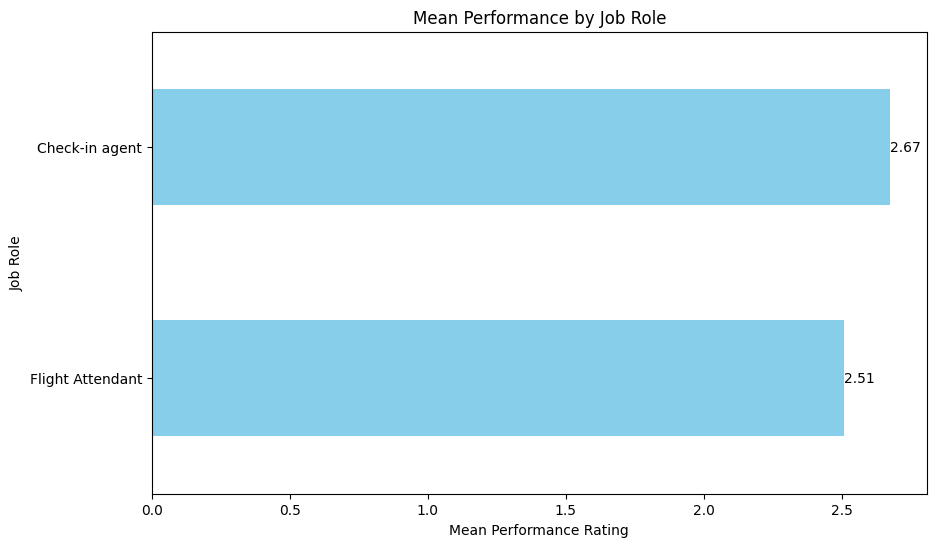

In [15]:
# Assuming df is your DataFrame with the necessary data
# Perform Exploratory Data Analysis (EDA)
# Print mean performance of each job role in a column chart
mean_performance_by_role = df.groupby('EmpJobRole')['PerformanceRating'].mean()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = mean_performance_by_role.sort_values().plot(kind='barh', color='skyblue')

# Annotating the bars with their respective values
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}',  # Format the value to two decimal places
             va='center', ha='left', color='black', fontsize=10)

plt.title('Mean Performance by Job Role')
plt.xlabel('Mean Performance Rating')
plt.ylabel('Job Role')
plt.show()


In [16]:
# Check for missing values
missing_values = df.isnull().sum()

In [17]:
# Drop unnecessary columns (if any) and justify the decision
# Example: Dropping EmpNumber if it's not contributing to the analysis
df = df.drop(['EmpNumber'], axis=1)

In [18]:
#rename column name to EmpHourlyRate
df.rename(columns={'EmpHourlyRate -> change according to the age & experience': 'EmpHourlyRate'}, inplace=True)

In [19]:
# Convert categorical attributes to numerical data types
# Use one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Gender', 'MaritalStatus', 'EmpJobRole', 'OverTime', 'Attrition'], drop_first=True)


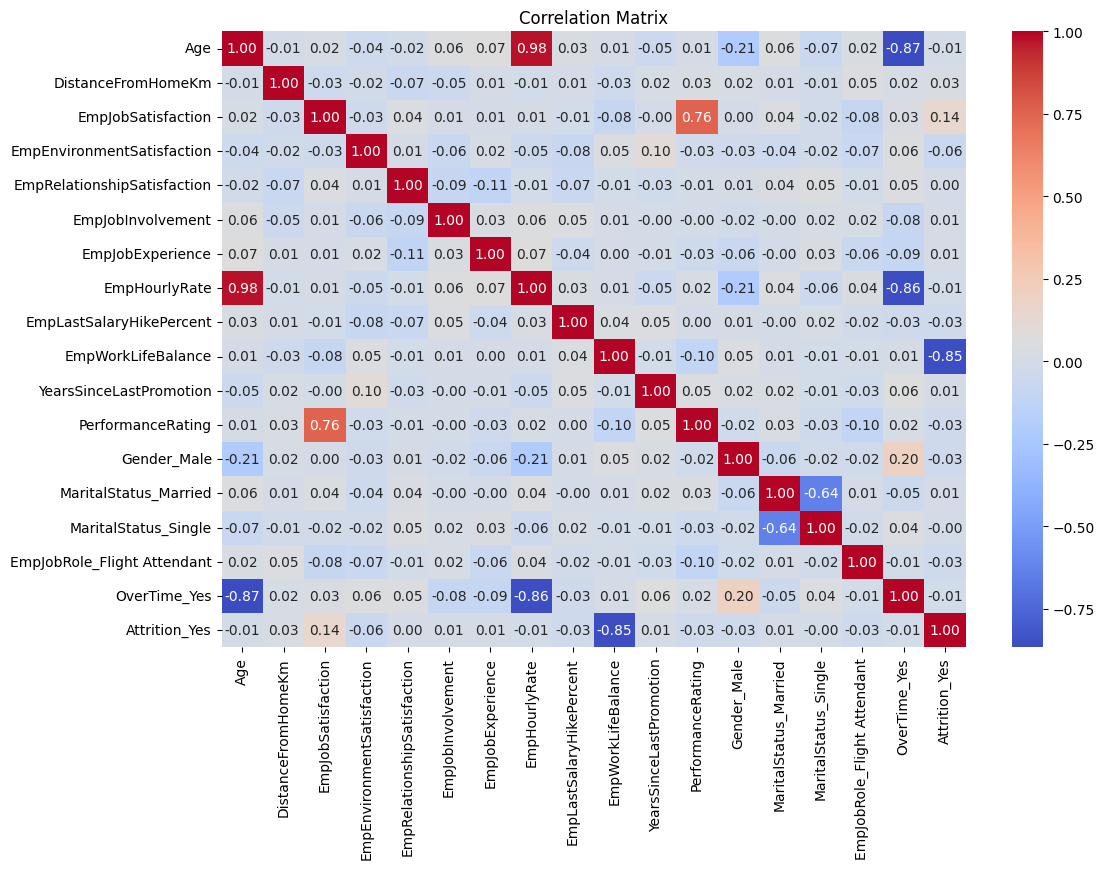

In [20]:
# Create and print a correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Determine the variables highly correlated with PerformanceRating

# Assuming correlation_matrix is your DataFrame with the correlation matrix
# performance_correlation is the Series containing correlations with PerformanceRating

# Specify the variables of interest
performance_correlation = correlation_matrix['PerformanceRating'].sort_values(ascending=False)
variables_list = ['EmpJobSatisfaction', 'EmpEnvironmentSatisfaction', 'EmpRelationshipSatisfaction']

# Filter the correlation values for the specified variables
selected_correlations = performance_correlation[variables_list]

# Create a DataFrame with the selected correlations
correlation_table = pd.DataFrame({'Variable': selected_correlations.index, 'Correlation': selected_correlations.values})

# Display the table
print("Correlation with Performance Rating:")
print(correlation_table)


Correlation with Performance Rating:
                      Variable  Correlation
0           EmpJobSatisfaction     0.758983
1   EmpEnvironmentSatisfaction    -0.025695
2  EmpRelationshipSatisfaction    -0.005870


In [22]:
pos = []
print("cloumns with the heighest impact on Performance")

for column in correlation_matrix.columns:
    if column != 'PerformanceRating':
        if(correlation_matrix[column]['PerformanceRating'] >= 0.1
           ) or (
            correlation_matrix[column]['PerformanceRating'] <= -0.09 
           ):
                pos.append(column)
                print(column, '=', correlation_matrix[column]['PerformanceRating'])


cloumns with the heighest impact on Performance
EmpJobSatisfaction = 0.7589828944507343
EmpWorkLifeBalance = -0.10161238394247978
EmpJobRole_Flight Attendant = -0.10469536063631464


In [23]:
# Machine Learning Model (Random Forest Classifier)
# Assuming 'PerformanceRating' is the target variable
X = df.drop(['PerformanceRating'], axis=1)
y = df['PerformanceRating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred, labels=[2, 3, 4, 5], target_names=[str(i) for i in range(2, 6)])
print("\nClassification Report:\n", class_report)


Model Accuracy: 0.6421052631578947

Classification Report:
               precision    recall  f1-score   support

           2       0.72      0.68      0.70       105
           3       0.49      0.55      0.51        66
           4       0.40      0.33      0.36         6
           5       1.00      1.00      1.00        13

    accuracy                           0.64       190
   macro avg       0.65      0.64      0.64       190
weighted avg       0.65      0.64      0.65       190

